This file define a benchmark model that we will use to compare the Neural Network to.

For this purpose, we choosen a Decision Tree model for the single images. Why DecisionTree? Because we know that the images are centred. Thus, approximately the same pixels should be set (or not) for the numbers. This will enable a Decision Tree to build rules based on the pixels set and the corresponding labels (at least theoretically). We can even move to a RandomForest in the future.

In [3]:
## import the modules
import numpy as np
import scipy.ndimage as ndimage
import scipy.io as sio
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import math
import os
import pylab as P
import skimage
from sklearn.cross_validation import train_test_split as ttsplit
import cPickle as pickle
# score this using f1 measure
from sklearn.metrics import f1_score



np.random.seed(1234)

In [4]:
#prepare to read data

def read_pickle_file(f_name):
    f = open(f_name, 'r')
    return pickle.load(f)

print os.getcwd()
data_dir = os.path.join(os.path.split(os.getcwd())[0], 'data')
print data_dir

def get_data_path(f_name):
    return os.path.join(data_dir, f_name)

/home/ag/projects/ml_nanodegree/clean_repo/capstone/src
/home/ag/projects/ml_nanodegree/clean_repo/capstone/data


In [5]:
#read data

file_list = [
    'train_single_data.pkl',
    'train_single_labels.pkl',
    'valid_single_data.pkl',
    'valid_single_labels.pkl',
    'test_single_data.pkl',
    'test_single_labels.pkl',
]


train_images, train_labels, valid_images, valid_labels, test_images, test_labels  = \
    [read_pickle_file(get_data_path(f_name)) for f_name in file_list]


In [20]:
# reshape the images to a 2d vector coz (as far as i can remember, that's what they like to see)

## make sure that the length is the same as before
## flatten the other dimensions to make a vector. let numpy figure out the length of those dimensions

train_reshape = train_images.reshape(train_images.shape[0], -1)
valid_reshape = valid_images.reshape(valid_images.shape[0], -1)
test_reshape  = test_images.reshape(test_images.shape[0], -1)

In [22]:
print train_reshape.shape
print valid_reshape.shape
print test_reshape.shape

(594368, 1024)
(9982, 1024)
(26032, 1024)


In [ ]:
## get the decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier as DTC

# TODO: implement using tf so this would be sorted quicky by the GPU

dtc = DTC()
dtc.fit(train_reshape, train_labels)

predicted_labels  = dtc.predict(test_reshape)

In [24]:
print f1_score(test_labels, predicted_labels, labels=range(10), average=None)
print f1_score(test_labels, predicted_labels, labels=range(10), average='weighted')

[ 0.51453648  0.69936583  0.61085232  0.49871112  0.59669992  0.51538623
  0.46410516  0.53759766  0.40278198  0.43656716]
0.558434721875


In [25]:
def display_images(images, labels, rand_indices=None):
    """
        Display random images from a set and return indices so we can match the results
    """
    display_size = 10
    display_per_row = 10
    num_rows = display_size/display_per_row
    if rand_indices is None:
        rand_indices = np.random.randint(0, images.shape[0], size=display_size)
    row_size = 20
    col_size = 20

    fig = P.figure(figsize=(20, 20))
    for idx in range(len(rand_indices)):
        orig_idx = rand_indices[idx]
        display_row_idx = int(idx/display_per_row) + 1
        display_col_idx = idx%display_per_row +1
        a=fig.add_subplot(display_row_idx, display_per_row, display_col_idx, frameon=False)
        a.get_yaxis().set_visible(False)
        a.get_xaxis().set_visible(False)
        a.imshow(images[orig_idx,:,:,0].T, cmap="Greys_r")
        img_label = labels[orig_idx]
        a.set_title(''.join([str(x) for x in img_label[img_label != 10]]))
    
    return rand_indices

array([ 6784, 21225, 12107, 10576, 16387, 17666, 17683, 14273,  6603,  4467])

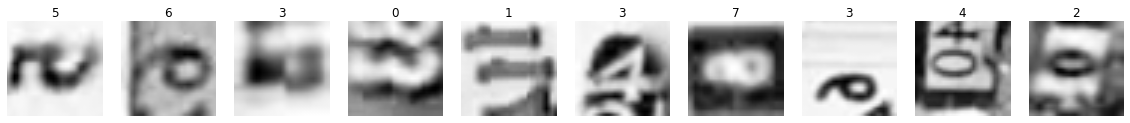

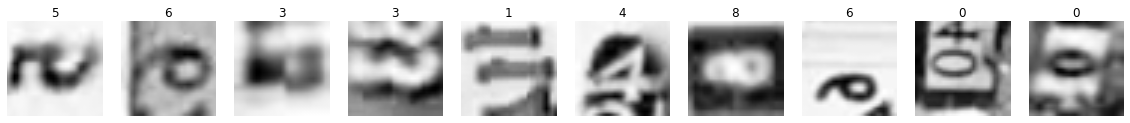

In [26]:
chosen_images = display_images(test_images, predicted_labels)
# display the originals too
display_images(test_images, test_labels, chosen_images)